#Machine Learning Assignement 2
###Barbe Victor 403715
###Pierre-Louis Gaucher 403783
###Antoine Bregeon 403719

First of all, we import the needed libraries

In [158]:
import sklearn
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Then we upload the dataset and print the first rows to see its general form using .head()

In [159]:
titles = pd.read_csv(Path("titles.csv"))
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


Here, we change the column type so it uses a numerical variable instead of a string one which isnt as easy to manipulate. If the type is 0 then it is a movie, if it is one then it is a show.

In [160]:
# 1 for SHOWS, 0 for MOVIES
titles["type"] = titles["type"].replace(["SHOW"], 1)
titles["type"] = titles["type"].replace(["MOVIE"], 0)
titles = titles.drop(columns = "title")
titles = titles.drop(columns = "description")
titles.head()

,id,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,1,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,0,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,0,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,0,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,0,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


Here we use two functions to get more information on the dataset. The function .info will print information about each column, and .column will simply print the name of all of the columns in the dataset

In [161]:
titles.info()
titles.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   type                  5850 non-null   int64  
 2   release_year          5850 non-null   int64  
 3   age_certification     3231 non-null   object 
 4   runtime               5850 non-null   int64  
 5   genres                5850 non-null   object 
 6   production_countries  5850 non-null   object 
 7   seasons               2106 non-null   float64
 8   imdb_id               5447 non-null   object 
 9   imdb_score            5368 non-null   float64
 10  imdb_votes            5352 non-null   float64
 11  tmdb_popularity       5759 non-null   float64
 12  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 594.3+ KB


Index(['id', 'type', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

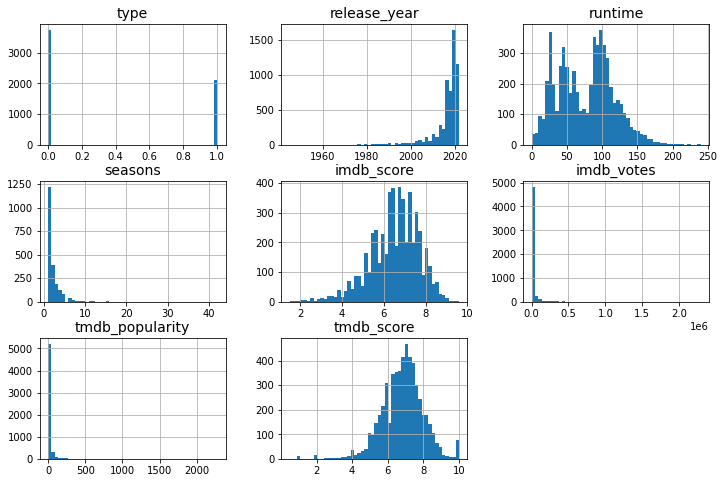

In [162]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

titles.hist(bins=50, figsize=(12, 8))

plt.show()

In [163]:
titles["genres"]

0                                 ['documentation']
1                                ['drama', 'crime']
2       ['drama', 'action', 'thriller', 'european']
3                   ['fantasy', 'action', 'comedy']
4                                 ['war', 'action']
                           ...                     
5845                           ['romance', 'drama']
5846                                      ['drama']
5847                                     ['comedy']
5848                                             []
5849              ['family', 'animation', 'comedy']
Name: genres, Length: 5850, dtype: object

Here, the next lines will be use to change the column genre. The database has a column with all the genres of the movie. We want to create one column for each genre, and then put the value on 1 if the genre corresponds to the movie, 0 if it isn't the case.

In [164]:
titles["genres"] = titles["genres"].replace(["'"], " ")
titles["genres"] = titles["genres"].replace(["]"], " ")
titles["genres"] = titles["genres"].replace(["["], " ")
print(titles["genres"])


0                                 ['documentation']
1                                ['drama', 'crime']
2       ['drama', 'action', 'thriller', 'european']
3                   ['fantasy', 'action', 'comedy']
4                                 ['war', 'action']
                           ...                     
5845                           ['romance', 'drama']
5846                                      ['drama']
5847                                     ['comedy']
5848                                             []
5849              ['family', 'animation', 'comedy']
Name: genres, Length: 5850, dtype: object


Now that we modified the 'genres' column as we wanted, we can split it to get all the different unique genres that appear in the dataset.\

In [165]:
titles['genres'] = titles['genres'].str.replace("'","")
titles['genres'] = titles['genres'].str.replace("[","")
titles['genres'] = titles['genres'].str.replace("]","")
titles['genres'] = titles['genres'].str.replace("'","")

print(titles["genres"])

0                           documentation
1                            drama, crime
2       drama, action, thriller, european
3                 fantasy, action, comedy
4                             war, action
                      ...                
5845                       romance, drama
5846                                drama
5847                               comedy
5848                                     
5849            family, animation, comedy
Name: genres, Length: 5850, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
distinctTitles = titles['genres'].str.split(",", expand = True)
distinctTitles=distinctTitles[0].unique()
print(distinctTitles)
distinctTitles = np.delete(distinctTitles, 17)
print(distinctTitles)



['documentation' 'drama' 'fantasy' 'war' 'comedy' 'thriller' 'crime'
 'romance' 'action' 'western' 'history' 'music' 'horror' 'scifi'
 'animation' 'family' 'reality' '' 'sport']
['documentation' 'drama' 'fantasy' 'war' 'comedy' 'thriller' 'crime'
 'romance' 'action' 'western' 'history' 'music' 'horror' 'scifi'
 'animation' 'family' 'reality' 'sport']


Now we can add a column for each distinct genre

In [167]:
for i in distinctTitles:
  titles.insert(5,i,0, allow_duplicates=False)

print(titles)

             id  type  release_year age_certification  runtime  sport  \
0      ts300399     1          1945             TV-MA       51      0   
1       tm84618     0          1976                 R      114      0   
2      tm154986     0          1972                 R      109      0   
3      tm127384     0          1975                PG       91      0   
4      tm120801     0          1967               NaN      150      0   
...         ...   ...           ...               ...      ...    ...   
5845  tm1014599     0          2021               NaN      100      0   
5846   tm898842     0          2021               NaN      134      0   
5847  tm1059008     0          2021               NaN       90      0   
5848  tm1035612     0          2021             PG-13       37      0   
5849   ts271048     1          2021               NaN        7      0   

      reality  family  animation  scifi  horror  music  history  western  \
0           0       0          0      0       0

In [168]:
print(titles.head())
print(titles.columns)

         id  type  release_year age_certification  runtime  sport  reality  \
0  ts300399     1          1945             TV-MA       51      0        0   
1   tm84618     0          1976                 R      114      0        0   
2  tm154986     0          1972                 R      109      0        0   
3  tm127384     0          1975                PG       91      0        0   
4  tm120801     0          1967               NaN      150      0        0   

   family  animation  scifi  horror  music  history  western  action  romance  \
0       0          0      0       0      0        0        0       0        0   
1       0          0      0       0      0        0        0       0        0   
2       0          0      0       0      0        0        0       0        0   
3       0          0      0       0      0        0        0       0        0   
4       0          0      0       0      0        0        0       0        0   

   crime  thriller  comedy  war  fantasy  dr

Now that we added a column for each genre, we will the column with a 1 whenever this gender appeared in the 'genres' column for this movie.

In [169]:
index = 0
for i in titles["genres"]: 
  tab = i.split(",")
  for j in tab:
    j = j.strip()
    titles.loc[index, j] = 1
  index +=1


Here since the age certification are different labels, we do the same we did for the 'genres' column. We split it and create different columns.

In [170]:
# splitting age certification in multiple columns, filled with 0 or 1
unique_certification = titles["age_certification"].unique()

for i in unique_certification: 
  titles.insert(5, i, 0, allow_duplicates = False)

index = 0
for i in titles["age_certification"]: 
  titles.loc[index, i] = 1
  index += 1




Again, we want to split the production_countries column into many columns (one for each county) to make the rest of the task easier. We use the same process, and fill the column with a 1 when the movie was produced in this country, 0 when it wasn't.

In [171]:
# splitting production countries into multiple columns, filled with 0 or 1

titles['production_countries'] = titles['production_countries'].str.replace("'","")
titles['production_countries'] = titles['production_countries'].str.replace("[","")
titles['production_countries'] = titles['production_countries'].str.replace("]","")
titles['production_countries'] = titles['production_countries'].str.replace("'","")


unique_production_country = titles["production_countries"].str.split(",", expand = True)
unique_production_country = unique_production_country[0].unique()
index = 0
for i in titles["production_countries"]: 
  tab = i.split(",")
  for j in tab: 
    j = j.strip()
    titles.loc[index, j] = 1
  index +=1


# titles.drop([''], axis =1)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


Now, to study the dataset we decided to divide it into two parts, movies and series. Indeed it is complicated to create models comparing movies and series when they have a completely different structure, don't last nearly as long, ...

We then drop the useless columns from each data frame (like the number of seasons for movies)

In [172]:
# splitting the df into 2 distincts : films and series
# series correspond to the rows in titles where seasons is non null
series = titles[titles.seasons >= 1].reset_index()

# films is the entire "titles" DF without the series DF
films = pd.concat([titles, series]).drop_duplicates(keep = False).reset_index()

# we leave seasons from films because it's not relevant
films = films.drop(columns = {"seasons", "type"})

# cleaning float values
for i in unique_certification: 
  series[i] = series[i].astype(int)

series["seasons"] = series["seasons"].astype(int)

# removing useless rows from seasons

series = series.drop(columns = {"R", "PG", "PG-13", "G", "NC-17", "type"})

In [173]:
pd.set_option('max_columns', None)
pd.set_option('display.max_columns', None)

col_names = []
for i in range(len(films.columns)): 
  col_names.append(films.columns[i])



Now, we will try to find a correlation between different variables. We will first try to plot some graphe, just bellow will be the link between the length of the movie and the date.

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


[102.0, 215.0, 120.0, 77.0, 142.0, 158.0, 158.0, 186.0, 117.0, 260.0, 189.0, 102.0, 292.0, 65.5, 81.0, 100.5, 186.5, 50.0, 47.0, 175.0, 89.5, 69.25, 167.5, 109.0, 135.4, 17.4, 66.85714285714286, 78.42857142857143, 112.42857142857143, 154.28571428571428, 104.375, 122.22222222222223, 20.0, 101.46666666666667, 116.6, 69.0, 38.8125, 114.1875, 121.38888888888889, 67.0, 41.88461538461539, 80.37037037037037, 66.54838709677419, 75.1, 98.35714285714286, 72.8, 83.51724137931035, 81.96551724137932, 82.24358974358974, 76.72151898734177, 74.75294117647059, 72.29464285714286, 75.1231884057971, 74.21176470588236, 72.3502538071066, 63.50320512820513, 64.38911290322581, 93.21955719557195, 92.7345013477089, 69.4165890027959, 64.31789282470481, 62.63918439716312, 29.330427201394944]


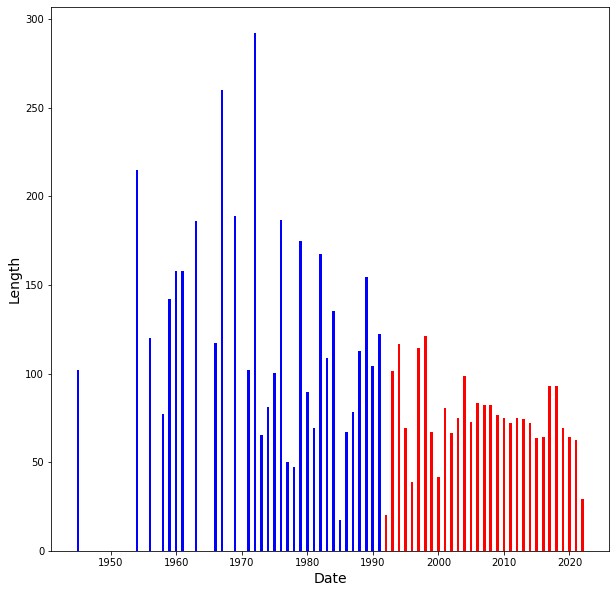

In [174]:
# trying to find correlation between release date and duration in films

release_duration_df = films[["release_year", "runtime"]]
release_duration_df.sort_values(by =["release_year"], inplace = True)

average_duration_year = []
unique_year = release_duration_df["release_year"].unique()

## getting the total amount of runtime/year
runtime_year = release_duration_df.groupby(["release_year"]).runtime.sum().reset_index()

# getting this amount in an array
runtimes = []
for i in runtime_year["runtime"]: 
  runtimes.append(i)

## getting the number of films/year
film_year = release_duration_df["release_year"].value_counts().reset_index()
film_year.sort_values(by = ["release_year"], inplace = True)

# getting this amount in an array

nb_film_year_array = []
for i in film_year["release_year"]: 
  nb_film_year_array.append(i)

count = 0
for i in unique_year: 
  mean = runtimes[count] / nb_film_year_array[count]
  average_duration_year.append(mean)
  count += 1

print(average_duration_year)

fig = plt.figure(figsize = (10, 10))
for i in range(len(nb_film_year_array)):
  if(nb_film_year_array[i] >= 10): 
    plt.bar(unique_year[i], average_duration_year[i], color= "red", width = 0.4)
  else: 
    plt.bar(unique_year[i], average_duration_year[i], color= "blue", width = 0.4)

plt.ylabel("Length")
plt.xlabel("Date")
plt.show()

# This plot looks to show us that most recent films has a lower runtime than older ones. 
# We have to take care of this because the more older is the film, the less we have data about it. 
# In blue, we have printed values where the number of films / year is less than 10. 
# We see that all the films before the 90's are in this case, making them quite irrelevant for the study. 

<BarContainer object of 18 artists>

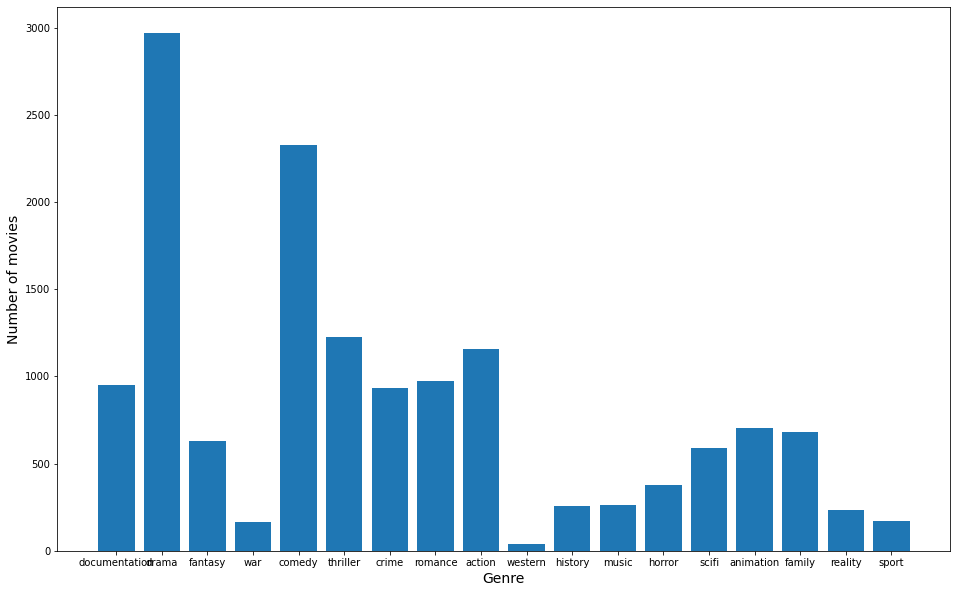

In [175]:
#number of movies by gender
tab=[]
for i in distinctTitles:
  count=0
  for j in range (0, 5849):
    if(titles[i][j]==1):
      count+=1
  tab.append(count)
fig= plt.figure(figsize = (16, 10))
plt.ylabel("Number of movies")
plt.xlabel("Genre")
plt.bar(distinctTitles,tab)

Now we will try to print the tmdb score and popularity depending on the genre of the movie. We can see that the score doesn't seem to vary much depending on the genre. However, we can see that some genre of movies are more popular than others, as exepected. As an example, horror movies are much more popular than documentaries

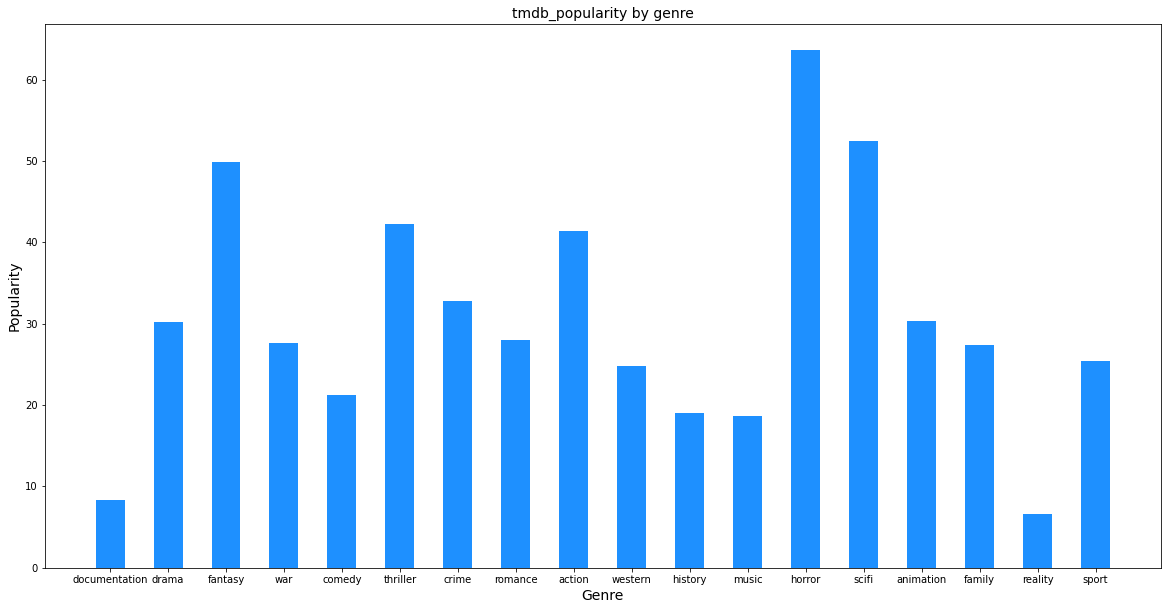

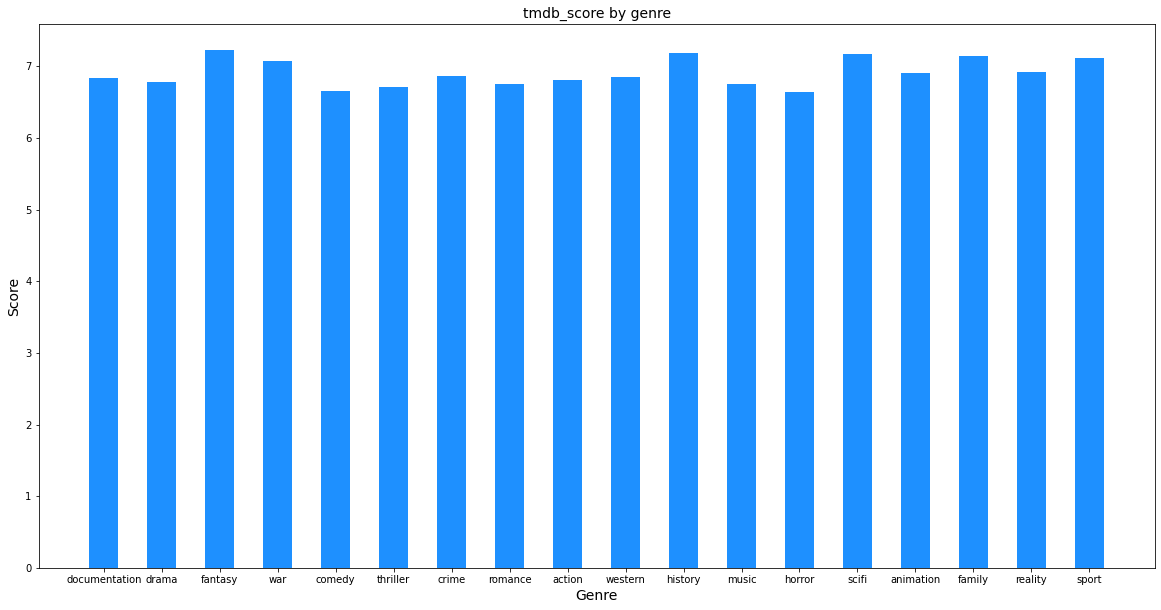

In [176]:
# Trying to find corrolation between genre and score for films for tmdb, and between genre and popularity
genre_score_df = films[distinctTitles].astype(float)
genre_score_df["tmdb_popularity"] = films["tmdb_popularity"].astype(float)
genre_score_df["tmdb_score"] = films["tmdb_score"].astype(float)
genre_score_df['tmdb_popularity'] = genre_score_df['tmdb_popularity'].fillna(0)
genre_score_df['tmdb_score'] = genre_score_df['tmdb_score'].fillna(0)
genre_score_df["runtime"] = films["runtime"].astype(float)

tab2 = []
fig = plt.figure(figsize = (20, 10))

for col in distinctTitles: 
  score = 0
  nb = 0
  for i in genre_score_df.index: 
    if genre_score_df.loc[i, col] == 1: 
      score += genre_score_df.loc[i, "tmdb_popularity"]
      nb += 1
  mean_score = score/nb
  tab2.append([col, mean_score]) # genre name, mean_score
  plt.bar(col, mean_score, color = "dodgerblue", width = 0.5)

plt.title("tmdb_popularity by genre")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.show()

tab2 = []
fig = plt.figure(figsize = (20, 10))

for col in distinctTitles: 
  score = 0
  nb = 0
  for i in genre_score_df.index: 
    if genre_score_df.loc[i, col] == 1: 
      score += genre_score_df.loc[i, "tmdb_score"]
      nb += 1
  mean_score = score/nb
  tab2.append([col, mean_score]) # genre name, mean_score
  plt.bar(col, mean_score, color = "dodgerblue", width = 0.5)

plt.title("tmdb_score by genre")
plt.xlabel("Genre")
plt.ylabel("Score")
plt.show()

We have printed a barplot showing the mean tmdb_popularity for each kind of genre and another showing the mean tmdb_score for each kind of genre. It attributes to each genres the mean of score/popularity of each film where defined by the genre. If a film is defined by "thriller", "action" and "scifi", it will add to the mean of score/popularity of these genres a new score/popularity value. 
- We can see huge disparities between popularity and genre. Some genres, such has documentation, are low compared to fantasy or horror. Some of these values can be explained by the lack of data on some genres. 
- Between score and genre, we can see that all the genres has a mean near to 7. It looks that in this dataset, tmdb_scores are almost the same compared to genres. 

Here when trying to find correlation between genre and runtime, we find some expected outputs such as a low run time for an animation movie.

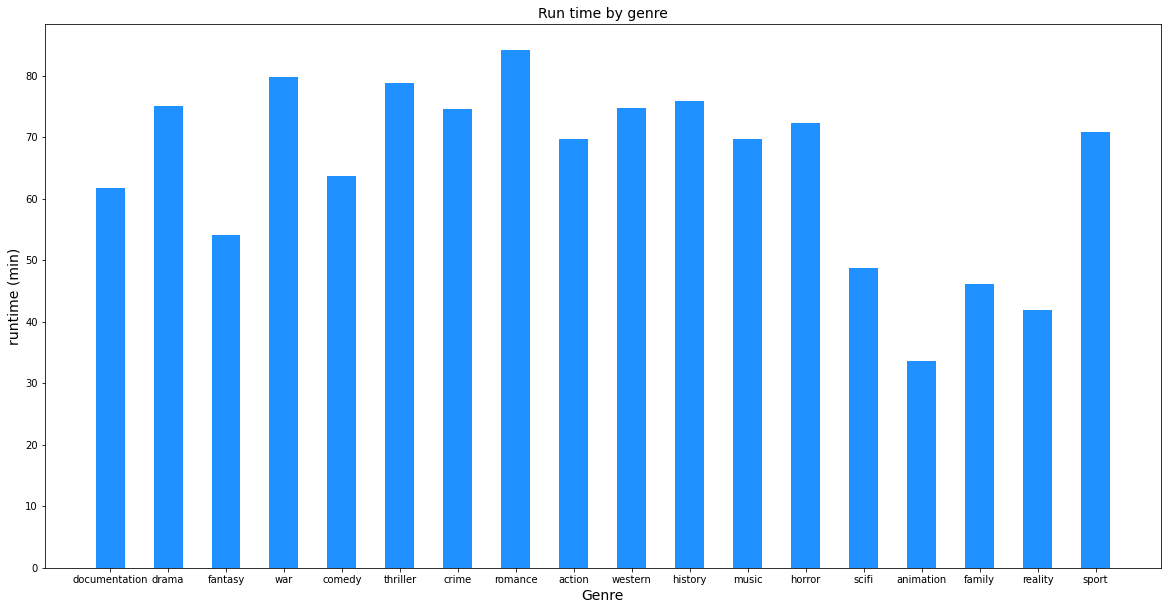

In [177]:
# showing correlation between genre and runtime (mean)

tab3 = []
fig = plt.figure(figsize = (20, 10))

for col in distinctTitles: 
  score = 0
  nb = 0
  for i in genre_score_df.index: 
    if genre_score_df.loc[i, col] == 1: 
      score += genre_score_df.loc[i, "runtime"]
      nb += 1
  mean_score = score/nb
  tab3.append([col, mean_score]) # genre name, mean_score
  plt.bar(col, mean_score, color = "dodgerblue", width = 0.5)

plt.title("Run time by genre")
plt.xlabel("Genre")
plt.ylabel("runtime (min)")
plt.show()

# It shows us that some genres, such has animation have a short runtime 
# while thrillers, war and romance genres has bigger ones
# It looks relevent compared of what we know about these genres. 

This piece of code allows to find different correlations between different columns in the dataset. This can give an general idea of the importance of the features, and how we can create links between them to predict the score or the popularity.

In [178]:
corrtab = []
for i in films: 
  if(np.issubdtype(films[i].dtypes, int) == True | np.issubdtype(films[i].dtypes, float)):
    for j in films: 
      if(((np.issubdtype(films[j].dtypes, int) == True)| np.issubdtype(films[j].dtypes, float) == True ) & (i != j)):
        corr = films[i].corr(films[j])
        corrtab.append(corr)
        if(corr > 0.10): 
          print("Correlation for ", i, " and ", j, " : ", corr)

corrtab.sort(reverse = True)

Correlation for  level_0  and  release_year  :  0.5730555026938721
Correlation for  level_0  and  runtime  :  0.12839498395250085
Correlation for  level_0  and  nan  :  0.27607456881999554
Correlation for  level_0  and  index  :  0.9987351970753361
Correlation for  release_year  and  level_0  :  0.5730555026938721
Correlation for  release_year  and  TV-MA  :  0.14938955031945753
Correlation for  release_year  and  index  :  0.7329519825764242
Correlation for  runtime  and  level_0  :  0.12839498395250082
Correlation for  runtime  and  PG-13  :  0.25767129000247724
Correlation for  runtime  and  nan  :  0.36033013989727825
Correlation for  runtime  and  PG  :  0.16696237840750308
Correlation for  runtime  and  R  :  0.27178376328105314
Correlation for  runtime  and  romance  :  0.19414439264721423
Correlation for  runtime  and  thriller  :  0.15748921959900902
Correlation for  runtime  and  drama  :  0.22104538833944012
Correlation for  runtime  and  imdb_votes  :  0.13059610240863118


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation for  G  and  family  :  0.10719038679968611
Correlation for  G  and  animation  :  0.10303537027096472
Correlation for  TV-Y7  and  family  :  0.3206301584219981
Correlation for  TV-Y7  and  animation  :  0.35385947658569955
Correlation for  TV-Y7  and  scifi  :  0.20316085834012518
Correlation for  TV-Y7  and  action  :  0.2015898567195339
Correlation for  TV-Y7  and  comedy  :  0.131439372783848
Correlation for  TV-Y7  and  fantasy  :  0.19418639247026748
Correlation for  TV-Y7  and  tmdb_score  :  0.10337473672970744
Correlation for  TV-G  and  family  :  0.22130333435064223
Correlation for  TV-Y  and  family  :  0.3047422212595334
Correlation for  TV-Y  and  animation  :  0.3734110745389884
Correlation for  TV-Y  and  tmdb_score  :  0.11739973625448376
Correlation for  TV-PG  and  reality  :  0.23958701066677035
Correlation for  PG-13  and  runtime  :  0.25767129000247724
Correlation for  PG-13  and  imdb_votes  :  0.14837035575212007
Correlation for  TV-14  and  scifi 

Next, we will try to print some scatter plot of two columns to see if we can find any noticeable correlation. We will also print the actual correlation value between those columns.

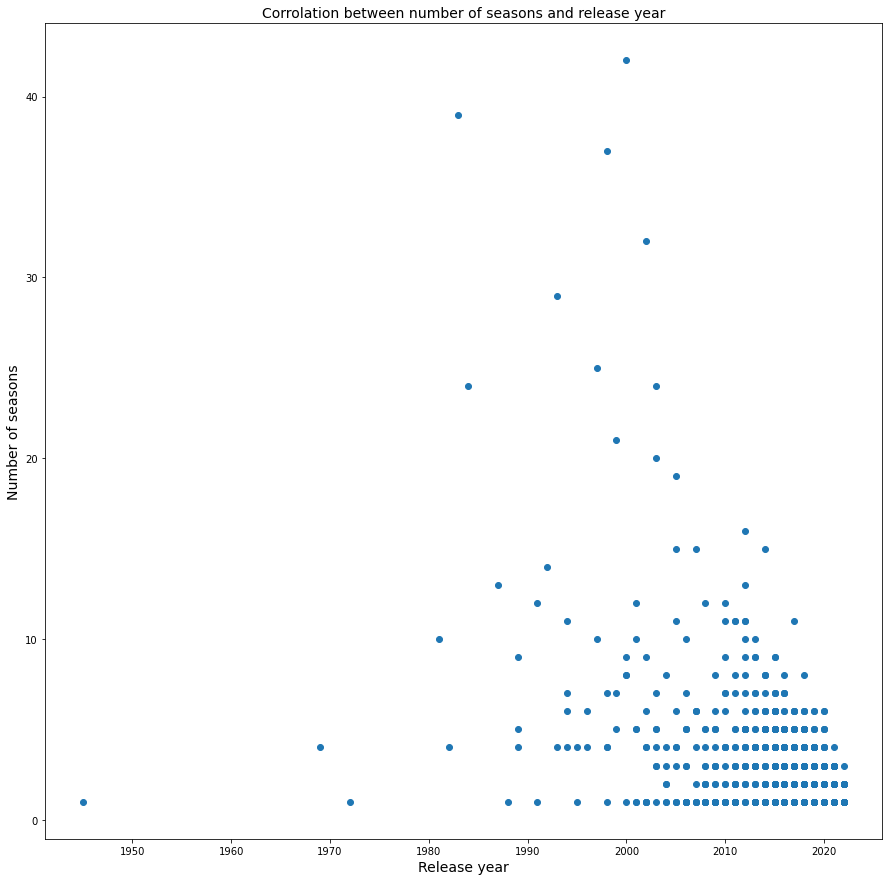

Correlation is:  -0.5


In [179]:
#corrolation between number of seasons and release year ?

#print(series.head())
fig = plt.figure(figsize = (15, 15))
plt.scatter(series["release_year"], series["seasons"])
plt.title("Corrolation between number of seasons and release year")
plt.xlabel("Release year")
plt.ylabel("Number of seasons")
plt.show()
corr = series["seasons"].corr(series["release_year"])
print("Correlation is: ", round(corr, 2))

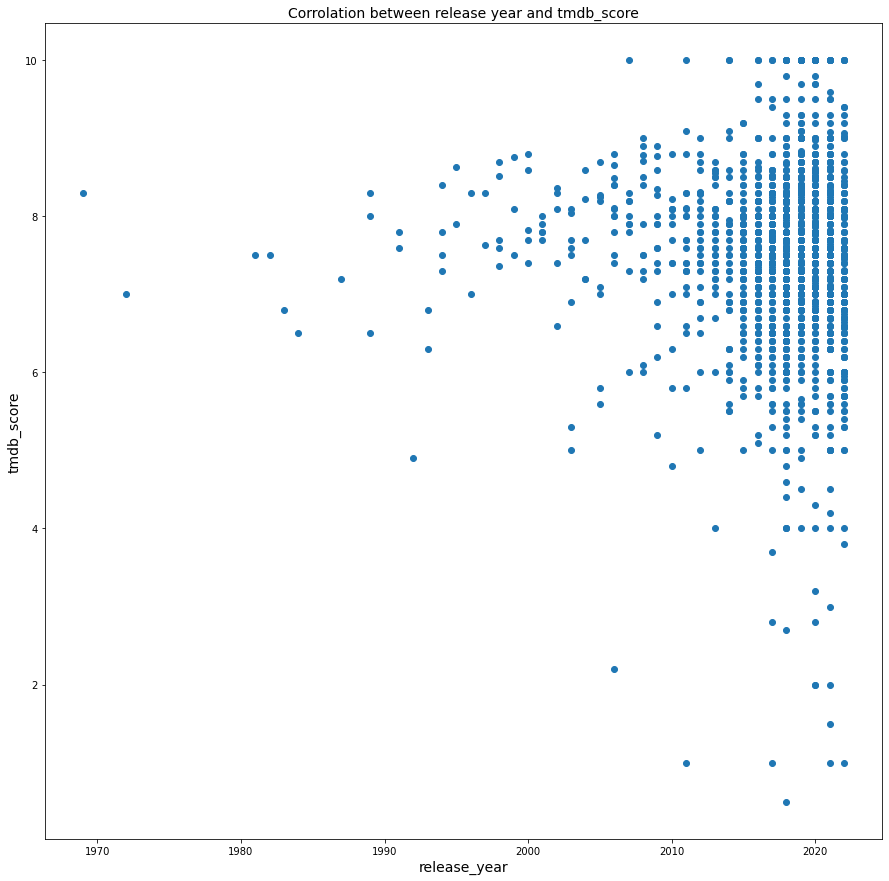

Correlation is:  -0.04


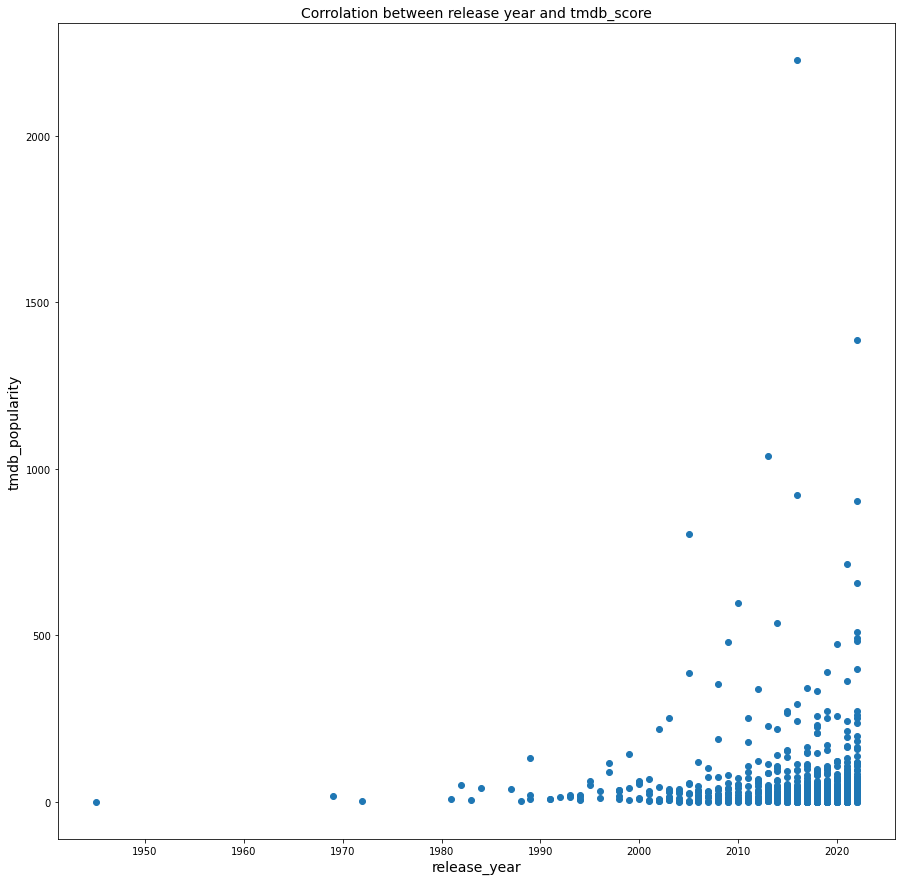

Correlation is:  -0.04
-0.04253916468901572


In [180]:
#corrolation between release year and score?

#tmdb_score
fig = plt.figure(figsize = (15, 15))
plt.scatter(series["release_year"],series["tmdb_score"])
plt.title("Corrolation between release year and tmdb_score")
plt.xlabel("release_year")
plt.ylabel("tmdb_score")
plt.show()
corr = series["tmdb_score"].corr(series["release_year"])
print("Correlation is: ", round(corr, 2))

#tmdb_popularity
fig = plt.figure(figsize = (15, 15))
plt.scatter(series["release_year"],series["tmdb_popularity"])
plt.title("Corrolation between release year and tmdb_score")
plt.xlabel("release_year")
plt.ylabel("tmdb_popularity")
plt.show()
corr = series["tmdb_popularity"].corr(series["release_year"])
print("Correlation is: ", round(corr, 2))
print(series["tmdb_popularity"].corr(series["release_year"]))

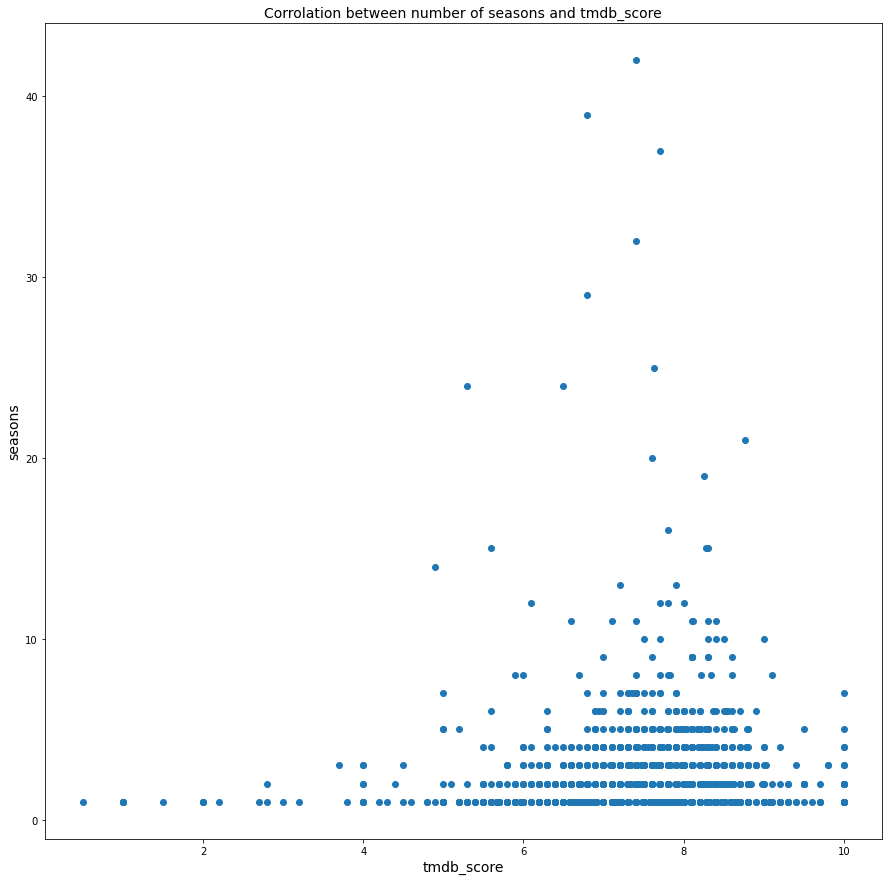

Correlation tmdb_score/season is:  0.04
0.044022846873139614


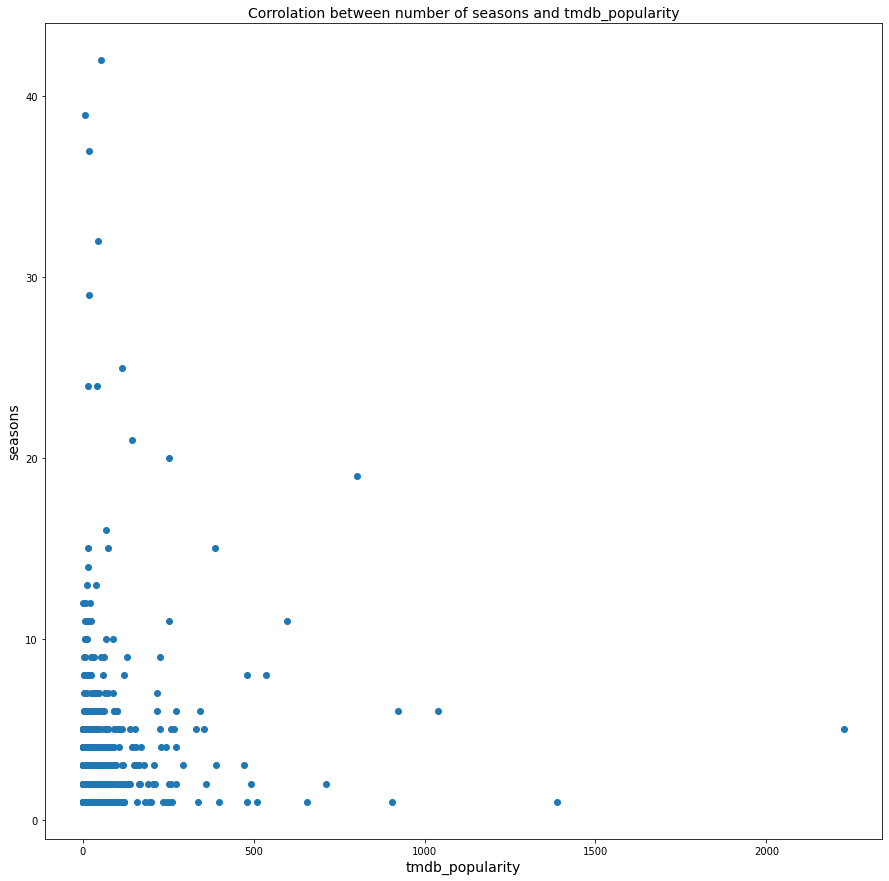

Correlation tmdb_popularity/season is:  0.17
0.16805106651455995


In [181]:
#corrolation between number of seasons and score ?

#print(series.head())
fig = plt.figure(figsize = (15, 15))
plt.scatter(series["tmdb_score"],series["seasons"])
plt.title("Corrolation between number of seasons and tmdb_score")
plt.xlabel("tmdb_score")
plt.ylabel("seasons")
plt.show()
corr = series["tmdb_score"].corr(series["seasons"])
print("Correlation tmdb_score/season is: ", round(corr, 2))
print(series["tmdb_score"].corr(series["seasons"]))

#tmdb_popularity

#tmdbpopularity
fig = plt.figure(figsize = (15, 15))
plt.scatter(series["tmdb_popularity"],series["seasons"])
plt.title("Corrolation between number of seasons and tmdb_popularity")
plt.xlabel("tmdb_popularity")
plt.ylabel("seasons")
plt.show()
corr = series["tmdb_popularity"].corr(series["seasons"])
print("Correlation tmdb_popularity/season is: ", round(corr, 2))
print(series["tmdb_popularity"].corr(series["seasons"]))

Below, we are trying to display the number of films/country. We will se that the US are mainly dominating, with six times more films than the second : India. 

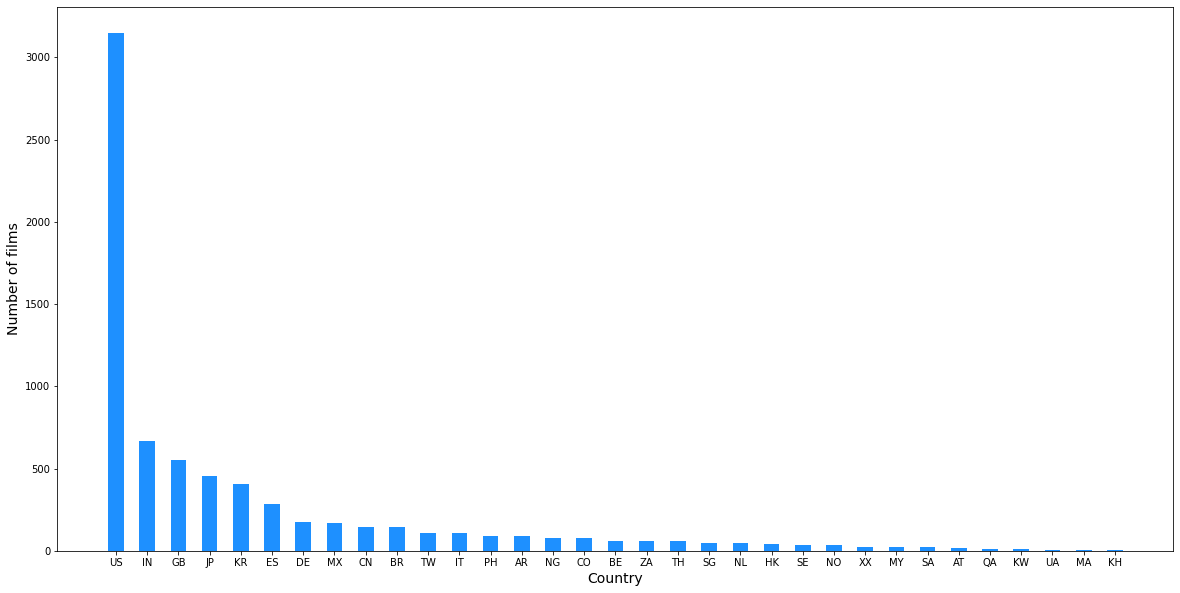

In [182]:
# Showing the number films/country of production
fig = plt.figure(figsize = (20, 10))

tab = []
prod_country = []

for i in unique_production_country: 
  if i != '':
    value = films[i].sum()
    tab.append(value)
    prod_country.append(i)

my_tab = [[]]

for i in range(len(tab)): 
  my_tab.append([tab[i], prod_country[i]])

my_tab.sort(reverse = True)

for i in range(len(unique_production_country) - 1):
  if tab[i] > 30:
    plt.bar(my_tab[i][1], my_tab[i][0], color = "dodgerblue", width = 0.5)

plt.xlabel("Country")
plt.ylabel("Number of films")

plt.show()





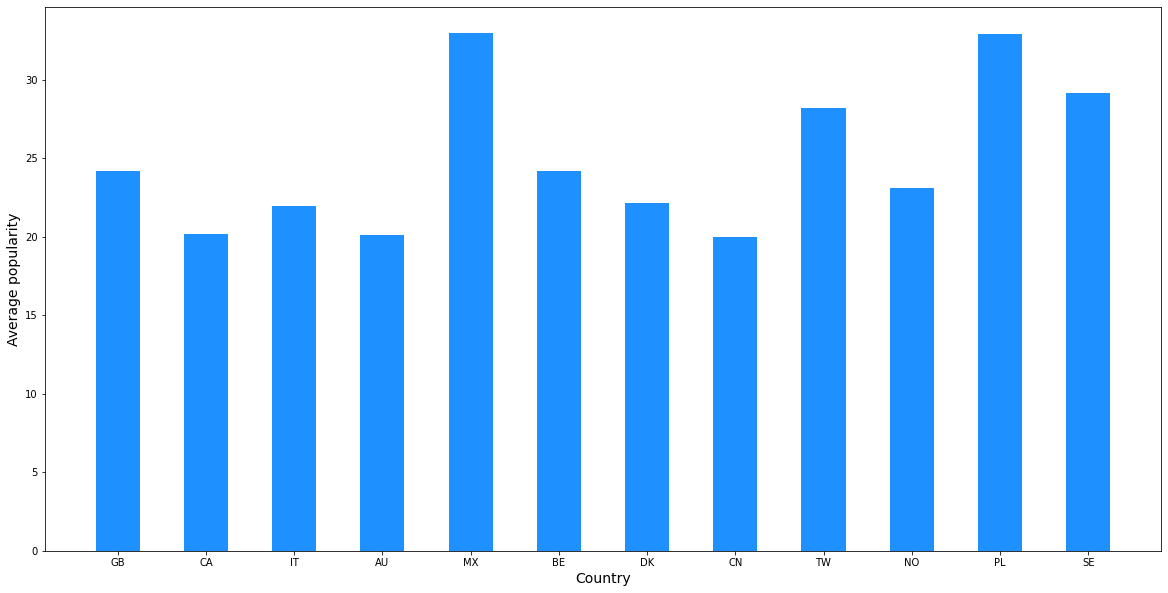

In [183]:
# trying to show the popularity of filmed produced by a country
fig = plt.figure(figsize = (20, 10))
films["tmdb_popularity"] = films["tmdb_popularity"].astype(float)
for col in prod_country: 
  score = 0
  nb = 0
  for i in films.index: 
    if films.loc[i, col] == 1: 
      score += films.loc[i, "tmdb_popularity"]
      nb+=1
  mean = score/nb
  if (mean >= 20) & (nb > 20):
    plt.bar(col, mean, color = "dodgerblue", width = 0.5)
  if(col.strip() == "US"):
    plt.bar(col, mean, color = "red", width = 0.5)

plt.xlabel("Country")
plt.ylabel("Average popularity")

plt.show()



We have printed the mean popularity of films produced by a country. We can see that the US are missing even if they were much important in the previous graph. It looks like our dataset is missing values concerning US popularity.

In the end, we add some trouble finding correlation between different columns. We created a loop that allows to chose the level of correlation we want to get, and when we set the level pretty high we can see that the correlated columns are the age restriction and the type of movie. The correlation found are the one expected (a low limit of age like 7 years old if often correlated with family genre). However, we had trouble finding high correlation between columns and the final score or popularity. The most relevant correlation with the popularity is most certainly the genre. Other than that there are other links like the number of episode for a serie, ... but they are not very important at all. The database is also lacking data for some categories, as an exemple for older movies. In general to build a model able to evaluate the popularity of a movie or a serie, we will need to keep the genre, the date, the length of the movie.